In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_clinical = pd.read_csv('X_train/clinical_train.csv')
df_molecular = pd.read_csv('X_train/molecular_train.csv')
df_target = pd.read_csv('target_train.csv')

df_main = pd.merge(df_clinical, df_target, on='ID')

print(f"Clinical shape: {df_clinical.shape}")
print(f"Molecular shape: {df_molecular.shape}")
print(f"Target shape: {df_target.shape}")

Clinical shape: (3323, 9)
Molecular shape: (10935, 11)
Target shape: (3323, 3)


In [ ]:
df_main.isnull().sum()

ID                0
CENTER            0
BM_BLAST        109
WBC             272
ANC             193
MONOCYTES       601
HB              110
PLT             124
CYTOGENETICS    387
OS_YEARS        150
OS_STATUS       150
dtype: int64

In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3323 non-null   object 
 1   CENTER        3323 non-null   object 
 2   BM_BLAST      3214 non-null   float64
 3   WBC           3051 non-null   float64
 4   ANC           3130 non-null   float64
 5   MONOCYTES     2722 non-null   float64
 6   HB            3213 non-null   float64
 7   PLT           3199 non-null   float64
 8   CYTOGENETICS  2936 non-null   object 
 9   OS_YEARS      3173 non-null   float64
 10  OS_STATUS     3173 non-null   float64
dtypes: float64(8), object(3)
memory usage: 285.7+ KB


In [10]:
df_main.dropna(subset=['OS_YEARS', 'OS_STATUS'], inplace=True)
df_main['OS_YEARS'] = pd.to_numeric(df_main['OS_YEARS'], errors='coerce')

# Ensure 'OS_STATUS' is boolean
df_main['OS_STATUS'] = df_main['OS_STATUS'].astype(bool)
df_main.describe()

,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,OS_YEARS
count,3094.000000,2944.000000,3032.000000,2629.000000,3098.000000,3087.000000,3173.000000
mean,6.071041,6.597417,3.286438,0.971848,9.861709,167.070758,2.480713
std,7.662941,10.405641,5.308014,2.710523,2.030977,150.234265,2.588259
min,0.000000,0.200000,0.000000,0.000000,4.000000,2.000000,0.000000
25%,1.000000,2.700000,1.000000,0.149000,8.500000,65.000000,0.652055
50%,3.000000,4.100000,2.000000,0.370000,9.700000,123.000000,1.652055
75%,8.000000,6.700000,3.700000,0.792000,11.100000,229.500000,3.572603
max,91.000000,154.400000,109.620000,44.200000,16.600000,1451.000000,22.043836


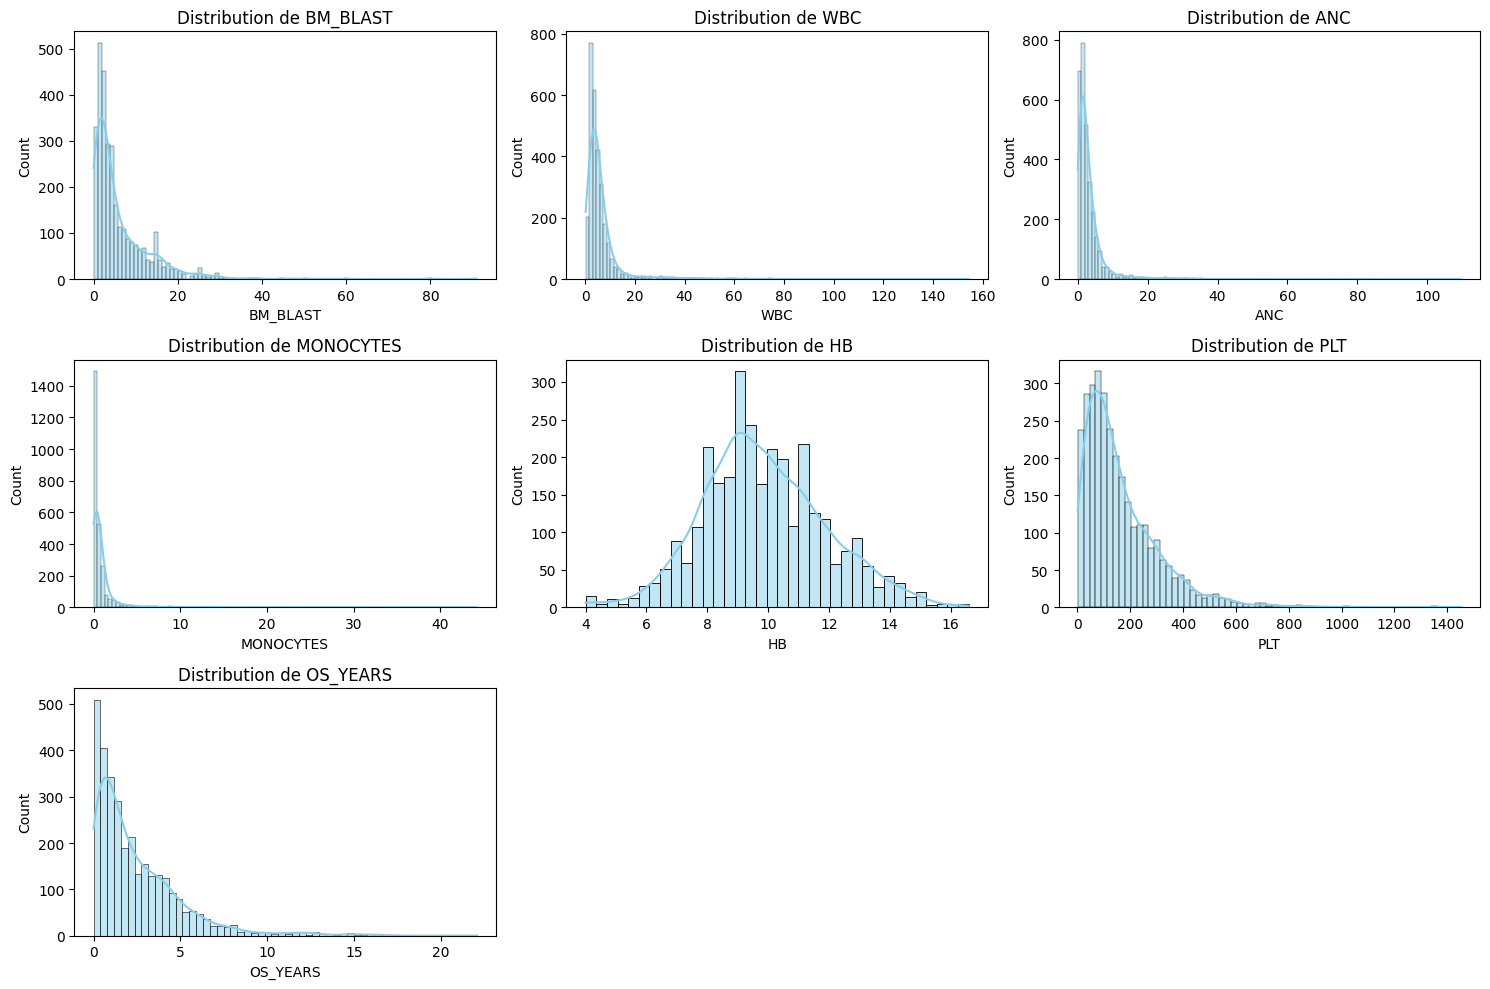

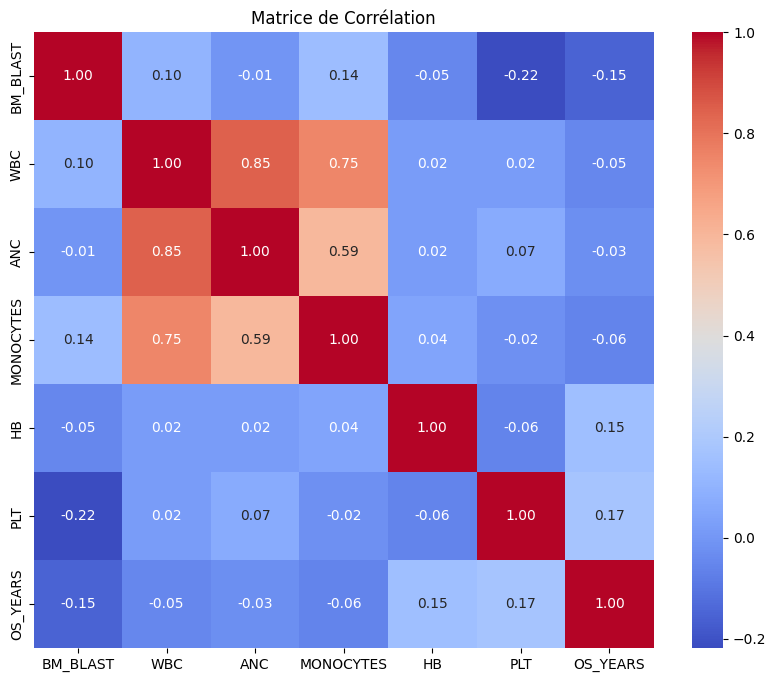

In [ ]:
numerical_features = ['BM_BLAST', 'WBC', 'ANC', 'MONOCYTES', 'HB', 'PLT', 'OS_YEARS']
categorical_features = ['CENTER', 'CYTOGENETICS', 'OS_STATUS'] 

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1) 
    sns.histplot(data=df_main, x=feature, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

corr_matrix = df_main[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

Total unique cytogenetic profiles: 1171

Top 10 most frequent profiles:
CYTOGENETICS
46,xy[20]    426
46,xx[20]    251
46,xy        241
46,xx        153
46,xy[25]     61
46,xx[25]     38
46,xy[21]     32
46,xx[26]     23
46,xy[26]     21
46,xy[24]     17
Name: count, dtype: int64


/var/folders/l3/z8jyrkb14yg13_8b5s0nffqr0000gn/T/ipykernel_9217/1809346718.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CENTER', data=df_main, order=df_main['CENTER'].value_counts().index, palette='viridis')


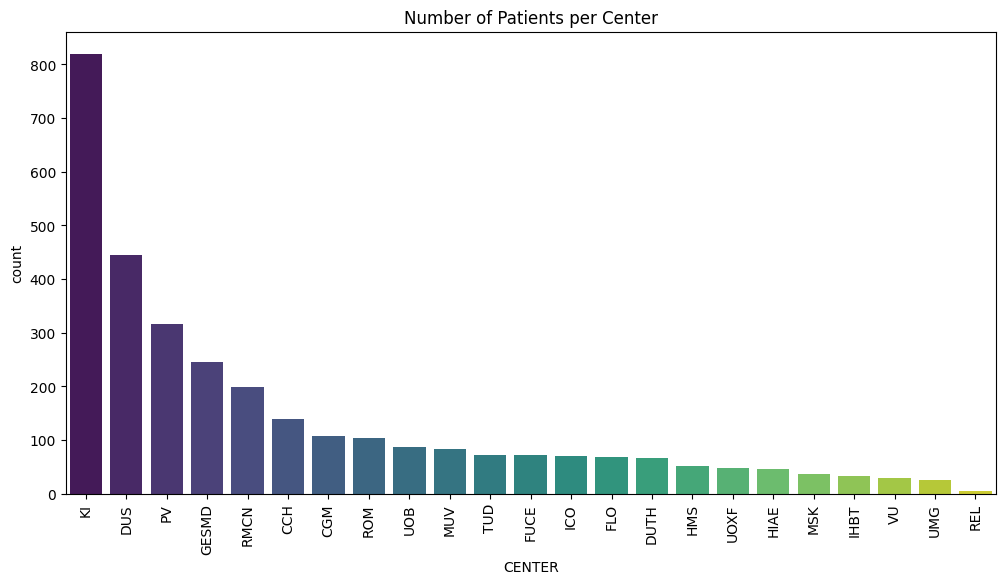

/var/folders/l3/z8jyrkb14yg13_8b5s0nffqr0000gn/T/ipykernel_9217/1809346718.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CENTER', y='OS_YEARS', data=df_main, order=df_main['CENTER'].value_counts().index, palette='viridis')


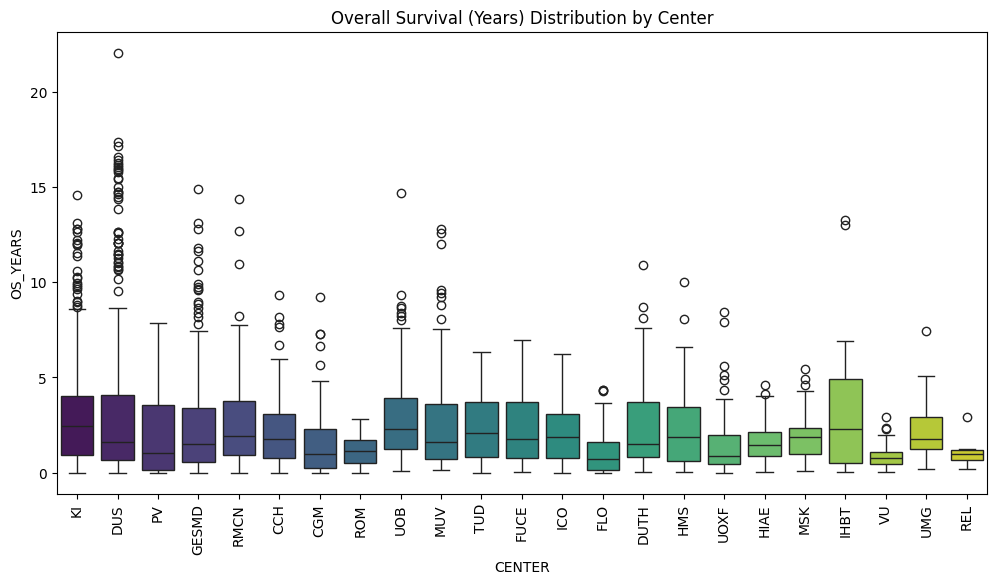

In [18]:
# Check cardinality (number of unique values) for Cytogenetics
unique_cyto = df_main['CYTOGENETICS'].nunique()
top_10_cyto = df_main['CYTOGENETICS'].value_counts().head(10)

print(f"Total unique cytogenetic profiles: {unique_cyto}")
print("\nTop 10 most frequent profiles:")
print(top_10_cyto)

# 1. Patient distribution per Center
plt.figure(figsize=(12, 6))
sns.countplot(x='CENTER', data=df_main, order=df_main['CENTER'].value_counts().index, palette='viridis')
plt.title("Number of Patients per Center")
plt.xticks(rotation=90)
plt.show()

# 2. Survival (OS_YEARS) distribution per Center
plt.figure(figsize=(12, 6))
sns.boxplot(x='CENTER', y='OS_YEARS', data=df_main, order=df_main['CENTER'].value_counts().index, palette='viridis')
plt.title("Overall Survival (Years) Distribution by Center")
plt.xticks(rotation=90)
plt.show()

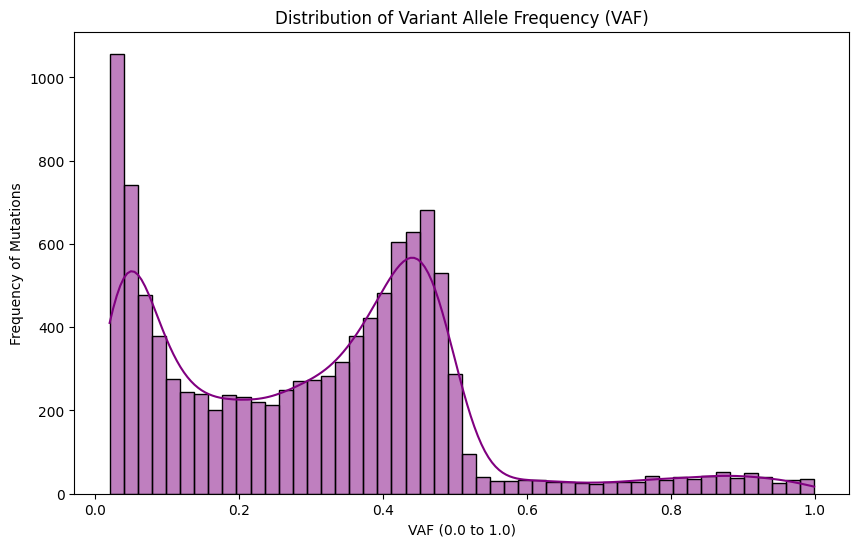

/var/folders/l3/z8jyrkb14yg13_8b5s0nffqr0000gn/T/ipykernel_9217/1437153396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENE', y='VAF', data=df_top_genes, palette='magma')


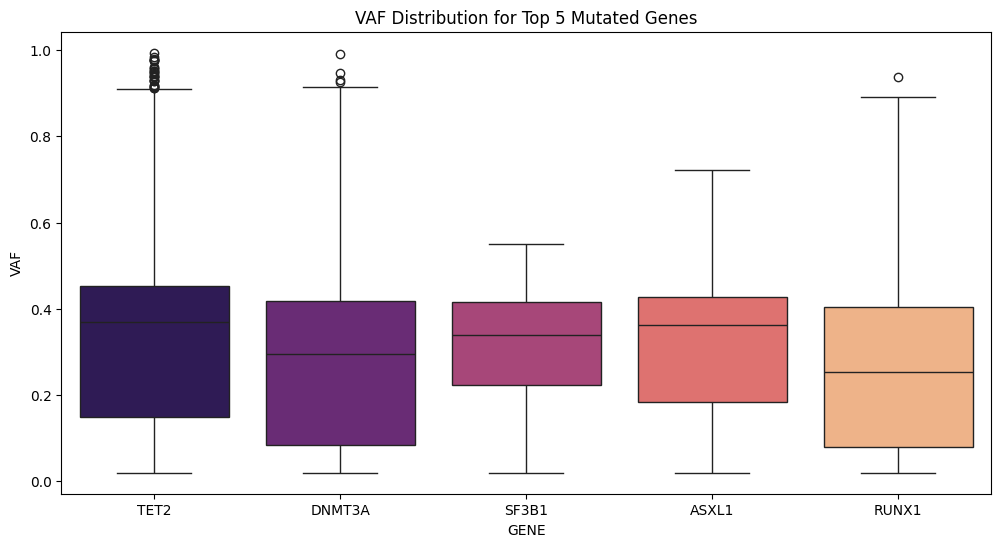

In [19]:
# Histogram of VAF to see the distribution of mutation dominance
plt.figure(figsize=(10, 6))
sns.histplot(df_molecular['VAF'], bins=50, kde=True, color='purple')
plt.title("Distribution of Variant Allele Frequency (VAF)")
plt.xlabel("VAF (0.0 to 1.0)")
plt.ylabel("Frequency of Mutations")
plt.show()

# Optional: VAF vs Gene (Are some genes always clonal?)
# Let's look at the top 5 genes
top_5_genes = df_molecular['GENE'].value_counts().head(5).index
df_top_genes = df_molecular[df_molecular['GENE'].isin(top_5_genes)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='GENE', y='VAF', data=df_top_genes, palette='magma')
plt.title("VAF Distribution for Top 5 Mutated Genes")
plt.show()

## EDA Conclusion

1.  **Clinical Data Quality:**
    * Target variable `OS_STATUS` successfully converted to boolean.
    * Missing values identified in `BM_BLAST`, `MONOCYTES`, etc. Imputation strategy needed.
    * Most of numerical features like `WBC` and `BM_BLAST` are right-skewed. Log-transformation might be required.

2.  **Categorical Complexity:**
    * `CYTOGENETICS` has very high cardinality (>1000 unique values). 
    * `CENTER` shows variation in patient count and survival, potentially introducing bias.

3.  **Molecular Insights:**
    * Significant number of mutations per patient varies.
    * `VAF` distribution shows peaks, suggesting a mix of clonal and subclonal mutations. This is a strong candidate for feature engineering.